## $\large\textbf{Question 1.2}$

$\large\textbf{For n=4 and a=20 List all the feasible permutations}.$\
with $\sum{jx_j}  \geq $ 20 for all permutations. So clearly all the permutations of **(1,2,3,4)** is included in the feasible solution given below:



$\large\textbf{Python program for generating a uniformly random permutations}$

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from itertools import permutations

In [3]:
def feasible_permutations(n,a):
  Feasible = []
  P=np.arange(1,n+1)
  pp=permutations(P)
  p=list(pp)
  for i in range(len(p)):
    if sum((k+1)*p[i][k] for k in range(n))> a:
      Feasible.append(p[i])
  return Feasible

list of all the feasible permutations

[(1, 2, 3, 4),
 (1, 2, 4, 3),
 (1, 3, 2, 4),
 (1, 3, 4, 2),
 (1, 4, 2, 3),
 (1, 4, 3, 2),
 (2, 1, 3, 4),
 (2, 1, 4, 3),
 (2, 3, 1, 4),
 (2, 3, 4, 1),
 (2, 4, 1, 3),
 (2, 4, 3, 1),
 (3, 1, 2, 4),
 (3, 1, 4, 2),
 (3, 2, 1, 4),
 (3, 2, 4, 1),
 (3, 4, 1, 2),
 (3, 4, 2, 1),
 (4, 1, 2, 3),
 (4, 1, 3, 2),
 (4, 2, 1, 3),
 (4, 2, 3, 1),
 (4, 3, 1, 2)]

In [4]:
def random_feasible_permutation(n,a):
  perm=feasible_permutations(n,a)
  np.random.shuffle(perm)
  return perm[0]

In [5]:
def generate_permutations_uniform(N,n,a):
  A=[]
  for i in range(N):
    gr=random_feasible_permutation(n,a)
    A.append(str(gr))
  plt.figure(figsize=(12,7))
  plt.title(f"Histogram of frequencies of feasible permutations (uniform)  n={n},a={a}", color= 'r')
  plt.hist(A)
  plt.show()

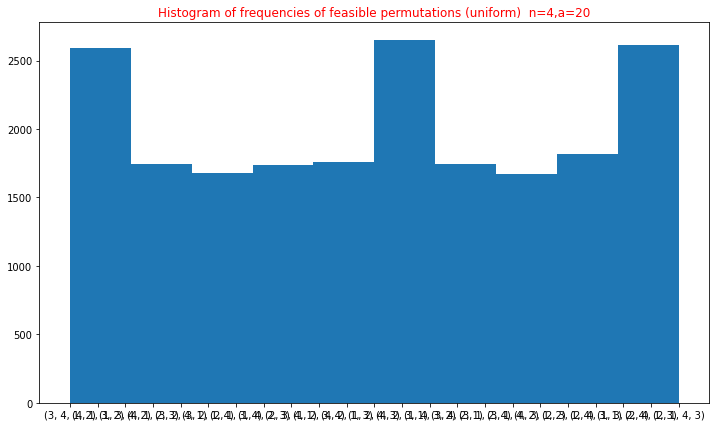

In [6]:
generate_permutations_uniform(1000*20,4,20)

## $\large\textbf{Question 1.3}$

In [15]:
def neighbours(p):
  N=len(p)
  p=list(p)
  nbr=[]
  for i in range(N):
    for j in range(i+1,N):
      ai=p[i]
      bi=p[j]
      c=p
      c[i]=bi
      c[j]=ai
      nbr.append(tuple(c))
  return nbr

In [16]:
#Feasible set of neighbours among all the neighbours.
def feasible_neighbours(n,a,p):
  Fnbr=[]
  pp=neighbours(p)
  for i in range(len(pp)):
    s=0
    for j in range(n):
      s = s + (j+1)*pp[i][j]
    if s > a :
      Fnbr.append(pp[i])
  return Fnbr

In [17]:
def random_feasible_neighbour(n,a,p):
  b=feasible_neighbours(n,a,p)
  np.random.shuffle(b)
  return b[0]

In [18]:
def q(i,j):
  ib=neighbours(i)
  q=0
  if j in ib:
    q=1/len(ib)
  return q

In [19]:
def alpha(i,j):
  a=min(q(j,i)/q(i,j),1)
  return a

here a permutation is moving from their state to their feasible neighbour with equal probability so we can take a sample from feasible permutation randomly as starting point and then randomly we can select a number from feasible list and move to that point and this procedure repeat upto N iteration

In [20]:
def generate_permutations_MCMC(N,n,a):
  p=random_feasible_permutation(n,a)
  A=[]
  for i in range(N):
    p=random_feasible_neighbour(n,a,p)
    A.append(str(p))
  plt.figure(figsize=(11,7))
  plt.hist(A)
  plt.title(f'number of iteration is {N},a={a} and n={n} (MCMC)')
  plt.show()

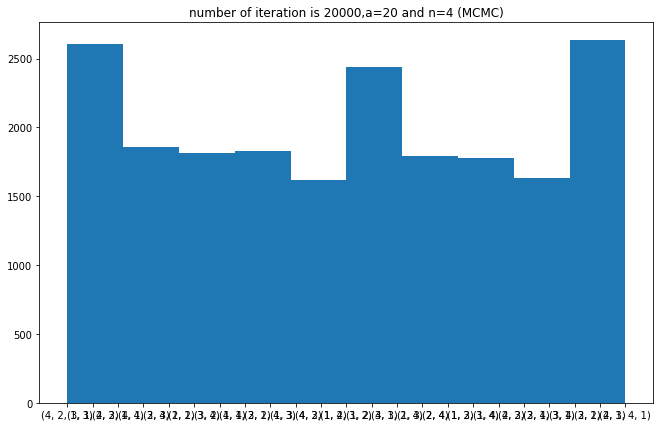

In [21]:
generate_permutations_MCMC(20*1000,4,20)

for n=2 it's not possible to generate feasible permutation with my roll number so i'm leaving n=2 and for all other number i have generated sample

for other values it takes vary large time so i interupted it 

In [25]:
for i in [10,40,60]:
  for j in [8,12]:
    generate_permutations_uniform(1000*20,j,i)
    generate_permutations_MCMC(20*1000,j,i)


KeyboardInterrupt: ignored

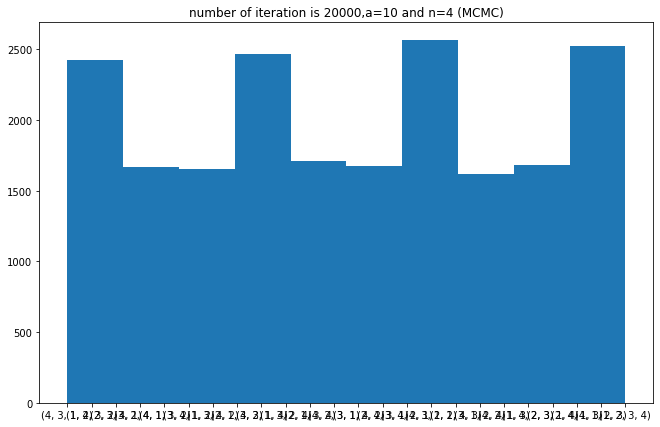

In [23]:
generate_permutations_MCMC(20*1000,4,10)

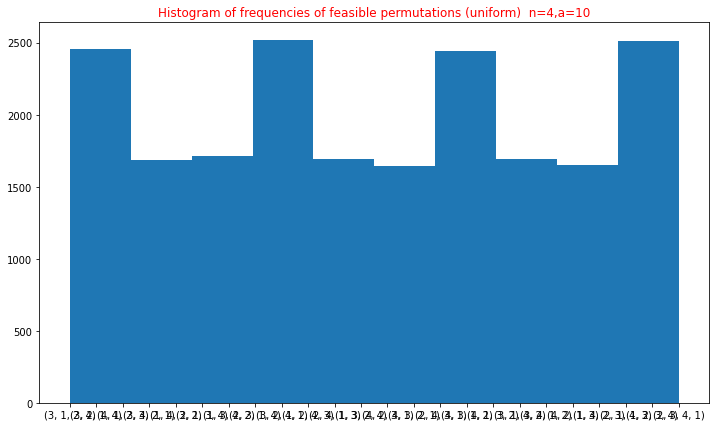

In [24]:
generate_permutations_uniform(1000*20,4,10)